# <center> Exercício Empírico III </center>
## <center> Econometria I - EAE0324 </center>
### <center> Julho 2022 </center>

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_palette(sns.dark_palette("#2EA3C5", reverse=True, n_colors=8))
plt.style.use(['seaborn-paper'])
pd.set_option('display.max_columns', 100)

> Este trabalho visa analisar a capacidade do aluno em responder a seguinte pergunta: Quais fatores (x) influenciam o desempenho das escolas no SAEB (y) em Matemática e Português?
> 
> Vocês têm as seguintes informações no banco de dados:
> 
> i) Desempenho das escolas no SAEB para os anos iniciais (1 a 4 ano) e finais (5 a 8 ano)  do ensino fundamental; desempenho para o SAEB do ensino médio. Variáveis nomeadas na base de dados como: inicial_mat; inicial_pt; final_mat; final_pt; medio_mat e medio_pt. Note que não são todas as escolas que possuem informações do SAEB e isso ocorre devido a alguma delas oferecerem apenas os anos finais, iniciais ou ensino médio. Podem excluir escolas sem NENHUMA informação das notas do SAEB.
> 
> ii) Informações das escolas coletadas no Censo Escolar.
> 
> ***ATIVIDADES***
> 
> 1) Análise descritiva das variáveis quantitativas e qualitativas da base: média, desvio padrão, mínimo, máximo, proporção etc. Lembrar a diferença na hora de realizar a análise para variáveis qualitativas e quantitativas como comentei na monitoria.
> 
> 2) Levantar o número de escolas que oferecem i) apenas os anos iniciais de ensino; ii) apenas os anos finais; iii) finais + iniciais; iv) apenas ensino médio e v) aquelas que oferecem tudo. Uma dica aqui é usar gráficos de barra, por exemplo. Pensem como informar esses dados de uma forma visualmente fácil de se entender.
> 
> 3) Propor três modelos econométricos que relacionem as notas do SAEB com as variáveis explicativas. As variáveis que vocês usarão como explicativas é de livre escolha, desde que argumentem de forma clara qual a relação com as notas do SAEB. Importante: é preciso incluir tanto variáveis qualitativas quanto quantitativas no modelo. Não há um número mínimo de variáveis que vocês devem adicionar, mas tentem incluir aquelas que vocês achem mais relevantes. Que não seja apenas uma, evidentemente. Além disso, tentem mudar algumas das variáveis escolhidas de um modelo para o outro.
> 
> Notem que temos seis potenciais variáveis explicadas (y).
> 
> Vocês podem fazer transformações nas variáveis (exemplo, total de matrículas) desde que faça sentido.
> 
> 4) Rodem os modelos propostos e expliquem os resultados, significância estatística e outras análises que vocês acham relevantes. Aqui deixo livre para vocês comentarem o que acham mais interessante. Usem todo o conhecimento das aulas e monitorias. Isso será levado em consideração na hora que eu corrigir.
> 
> 5) Citem limitações dos modelos propostos.
> 
> 
> 
> No arquivo em Excel consta o significado das variáveis do banco de dados. Vocês vão ver que as variáveis que começas com "num_" não constam no arquivo, mas elas se referem, por exemplo, ao número de professores no ensino fundamental (num_proffundamental). Se não ficar claro o significado dessas variáveis, me avisem.
>
>***A entrega é até o dia 06/07/22 às 23h59min***

***

## Tratamento dos Dados

In [4]:
df = pd.read_stata('data/raw/exercicio-empirico-03.dta')
df.head()

,co_municipio,codigo_escola,medio_mat,medio_pt,final_mat,final_pt,inicial_mat,inicial_pt,nu_ano_censo,co_regiao,co_uf,tp_dependencia,tp_localizacao,in_laboratorio_informatica,in_laboratorio_ciencias,in_quadra_esportes,in_cozinha,in_biblioteca,in_sala_leitura,nu_salas_utilizadas,nu_equip_tv,nu_equip_impressora,nu_computador,in_internet,nu_funcionarios,in_alimentacao,tp_atividade_complementar,num_profcreche,num_profpreescola,num_proffundamental,num_profmedio,num_matri_creche_total,num_turmas_creche_total,num_matri_preescola_total,num_turmas_preescola_total,num_matri_fund_total_geral,num_turmas_fund_total_geral,in_energia_inexistente,in_esgoto_inexistente,in_equip_tv,in_final_semana,num_turmas_fund_1,num_turmas_fund_2,num_turmas_fund_3,num_turmas_fund_4,num_turmas_fund_5,num_turmas_fund_6,num_turmas_fund_7,num_turmas_fund_8,num_matri_fund_1a4,num_matri_fund_5a8
0,1100205,11000058,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,11,4. Privada,1. Urbana,1,1,1,1,1,0,39,5,5,40,1,150,0,0,NaN,3.0,240.0,153.0,0.0,NaN,60.0,3.0,0.0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1100205,11000198,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,11,4. Privada,1. Urbana,1,1,1,1,1,1,33,18,9,80,1,196,0,1,16.0,16.0,149.0,78.0,65.0,5.0,105.0,5.0,0.0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1100205,11000201,NaN,NaN,NaN,NaN,221.98,212.63,2017,1,11,3. Municipal,1. Urbana,1,0,0,1,1,1,12,1,5,17,1,46,1,0,NaN,NaN,44.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1100205,11000244,NaN,NaN,NaN,NaN,NaN,NaN,2017,1,11,4. Privada,1. Urbana,0,0,1,1,0,0,16,5,15,46,1,65,0,0,NaN,NaN,78.0,52.0,0.0,NaN,0.0,NaN,0.0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1100205,11000252,331.5,333.01,NaN,NaN,NaN,NaN,2017,1,11,4. Privada,1. Urbana,1,1,1,0,1,1,23,2,2,49,1,96,0,1,9.0,18.0,111.0,61.0,41.0,3.0,102.0,6.0,0.0,0.0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74479 entries, 0 to 74478
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   co_municipio                 74479 non-null  int32   
 1   codigo_escola                74479 non-null  int32   
 2   medio_mat                    9381 non-null   float64 
 3   medio_pt                     9381 non-null   float64 
 4   final_mat                    24425 non-null  float64 
 5   final_pt                     24425 non-null  float64 
 6   inicial_mat                  39944 non-null  float64 
 7   inicial_pt                   39944 non-null  float64 
 8   nu_ano_censo                 74479 non-null  int16   
 9   co_regiao                    74479 non-null  int8    
 10  co_uf                        74479 non-null  int8    
 11  tp_dependencia               74479 non-null  category
 12  tp_localizacao               74479 non-null  category
 13  i

In [6]:
df.isna().sum()

co_municipio                       0
codigo_escola                      0
medio_mat                      65098
medio_pt                       65098
final_mat                      50054
final_pt                       50054
inicial_mat                    34535
inicial_pt                     34535
nu_ano_censo                       0
co_regiao                          0
co_uf                              0
tp_dependencia                     0
tp_localizacao                     0
in_laboratorio_informatica         0
in_laboratorio_ciencias            0
in_quadra_esportes                 0
in_cozinha                         0
in_biblioteca                      0
in_sala_leitura                    0
nu_salas_utilizadas                0
nu_equip_tv                        0
nu_equip_impressora                0
nu_computador                      0
in_internet                        0
nu_funcionarios                    0
in_alimentacao                     0
tp_atividade_complementar          0
n

In [7]:
# Selecionando as observaçoes relevantes para o 1o modelo
df1 = df.loc[df['final_mat'].notna() & df['final_pt'].notna()].reset_index()

df1 = df1[['final_mat', 'final_pt', 'in_laboratorio_informatica', 'in_laboratorio_ciencias', 'in_quadra_esportes', 
          'in_cozinha', 'in_biblioteca', 'in_sala_leitura', 'in_internet', 'in_alimentacao', 'tp_atividade_complementar',
          'tp_localizacao', 'num_proffundamental', 'num_matri_fund_total_geral', 'num_turmas_fund_total_geral', 
          'nu_salas_utilizadas', 'nu_funcionarios', 'num_matri_fund_5a8']]

df1['rural'] = list(df1['tp_localizacao'].map({'1. Urbana': 0, '2. Rural': 1}))

df1.to_csv("data/processed/exercicio-empirico-03-01.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24425 entries, 0 to 24424
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   final_mat                    24425 non-null  float64 
 1   final_pt                     24425 non-null  float64 
 2   in_laboratorio_informatica   24425 non-null  int8    
 3   in_laboratorio_ciencias      24425 non-null  int8    
 4   in_quadra_esportes           24425 non-null  int8    
 5   in_cozinha                   24425 non-null  int8    
 6   in_biblioteca                24425 non-null  int8    
 7   in_sala_leitura              24425 non-null  int8    
 8   in_internet                  24425 non-null  int8    
 9   in_alimentacao               24425 non-null  int8    
 10  tp_atividade_complementar    24425 non-null  int8    
 11  tp_localizacao               24425 non-null  category
 12  num_proffundamental          24425 non-null  float64 
 13  n

In [8]:
# Selecionando as observaçoes relevantes para o 2o e 3o modelo
df2 = df.loc[df['inicial_pt'].notna() & df['inicial_mat'].notna()].reset_index()

df2 = df2[['inicial_mat', 'inicial_pt', 'in_laboratorio_informatica', 'in_laboratorio_ciencias', 'in_quadra_esportes', 
           'in_cozinha', 'in_biblioteca', 'in_sala_leitura', 'in_internet', 'in_alimentacao', 'tp_atividade_complementar',
           'tp_localizacao', 'num_proffundamental', 'num_matri_fund_total_geral', 'num_turmas_fund_total_geral', 
           'nu_salas_utilizadas', 'nu_funcionarios', 'num_matri_fund_1a4']]

# Criando variaveis do 3o modelo
df2['matri/prof'] = df2['num_matri_fund_1a4'] / df2['num_proffundamental']
df2['matri/salas'] = df2['num_matri_fund_1a4'] / df2['nu_salas_utilizadas']
df2['com_escola_1'] = df2['in_laboratorio_informatica'] + df2['in_laboratorio_ciencias'] + df2['in_quadra_esportes'] + df2['in_cozinha'] + df2['in_biblioteca'] + df2['in_sala_leitura'] + df2['in_internet'] + df2['in_alimentacao']
df2['com_escola_2'] = df2['in_laboratorio_informatica'] + df2['in_laboratorio_ciencias'] + df2['in_quadra_esportes'] + df2['in_cozinha'] + df2['in_internet']


df2['rural'] = list(df2['tp_localizacao'].map({'1. Urbana': 0, '2. Rural': 1}))
df2['alimentacao_rural'] = df2['in_alimentacao'] * df2['rural']

# Mostrando informaçoes básicas do Df após o tratamento
df2.to_csv("data/processed/exercicio-empirico-03-02.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39944 entries, 0 to 39943
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   inicial_mat                  39944 non-null  float64 
 1   inicial_pt                   39944 non-null  float64 
 2   in_laboratorio_informatica   39944 non-null  int8    
 3   in_laboratorio_ciencias      39944 non-null  int8    
 4   in_quadra_esportes           39944 non-null  int8    
 5   in_cozinha                   39944 non-null  int8    
 6   in_biblioteca                39944 non-null  int8    
 7   in_sala_leitura              39944 non-null  int8    
 8   in_internet                  39944 non-null  int8    
 9   in_alimentacao               39944 non-null  int8    
 10  tp_atividade_complementar    39944 non-null  int8    
 11  tp_localizacao               39944 non-null  category
 12  num_proffundamental          39944 non-null  float64 
 13  n

***

## Descrição dos Dados

O objetivo deste exercício é estimar quais fatores influenciam o desempenho das escolas no SAEB em Matemática e Português. Para isto, usaremos os Dados da Educação Básica de 2013. Nesta base, possuímos informações sobre as notas das escolas, número de matrículas, número de professores, localização, entre outras.

Antes de partir para a estimação dos modelos, seguem a quantidade de escolas por região e sua oferta dos níveis de ensino. Através do último gráfico, vemos que as escolas que oferecem todos os níveis de ensino não minoria.

Text(0.5, 0, 'Região')

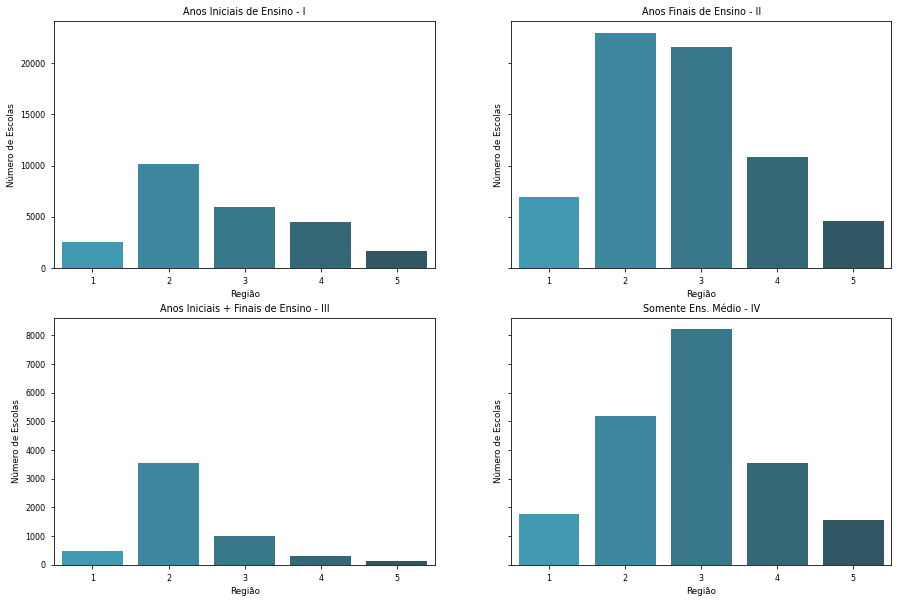

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey='row')


# Escolas que oferecem os anos iniciais de ensino - I
i = df.loc[df['num_profcreche'].notna() | df['num_profpreescola'].notna()]
i = i.pivot_table(index='co_regiao', values='codigo_escola', aggfunc='count')
sns.barplot(x=i.index, y='codigo_escola', data=i, orient='v', ax=ax[0, 0])

ax[0, 0].set_title('Anos Iniciais de Ensino - I')
ax[0, 0].set_ylabel('Número de Escolas')
ax[0, 0].set_xlabel('Região')


# Escolas que oferecem os anos finais - II
ii = df.loc[df['num_proffundamental'].notna()]
ii = ii.pivot_table(index='co_regiao', values='codigo_escola', aggfunc='count')
sns.barplot(x=ii.index, y='codigo_escola', data=ii, orient='v', ax=ax[0, 1])

ax[0, 1].set_title('Anos Finais de Ensino - II')
ax[0, 1].set_ylabel('Número de Escolas')
ax[0, 1].set_xlabel('Região')

# Escolas que oferecem os anos inciais e finais - III
iii = df.loc[df['num_profcreche'].notna() & df['num_profpreescola'].notna() & df['num_proffundamental'].notna()]
iii = iii.pivot_table(index='co_regiao', values='codigo_escola', aggfunc='count')
sns.barplot(x=iii.index, y='codigo_escola', data=iii, orient='v', ax=ax[1, 0])

ax[1, 0].set_title('Anos Iniciais + Finais de Ensino - III')
ax[1, 0].set_ylabel('Número de Escolas')
ax[1, 0].set_xlabel('Região')

# Escolas que oferecem apenas o ensino médio - IV
iv = df.loc[df['num_profmedio'].notna()]
iv = iv.pivot_table(index='co_regiao', values='codigo_escola', aggfunc='count')
sns.barplot(x=iv.index, y='codigo_escola', data=iv, orient='v', ax=ax[1, 1])

ax[1, 1].set_title('Somente Ens. Médio - IV')
ax[1, 1].set_ylabel('Número de Escolas')
ax[1, 1].set_xlabel('Região')

Text(0.5, 0, 'Região')

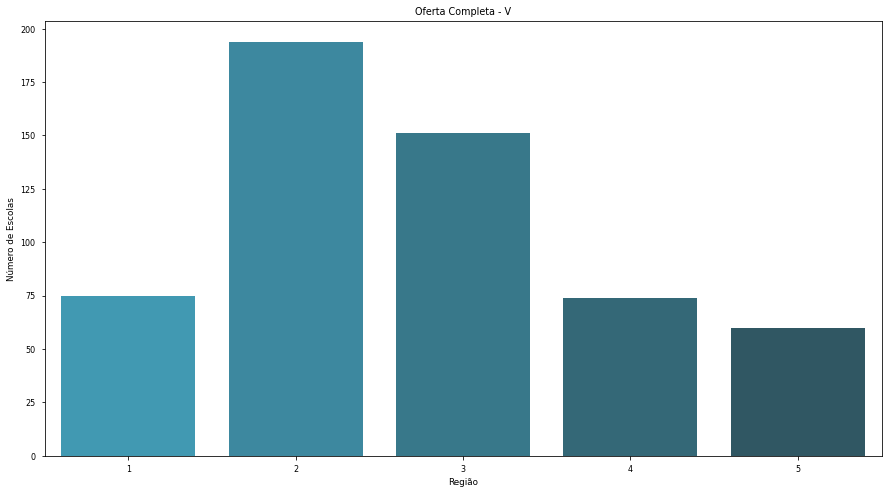

In [98]:
fig, ax = plt.subplots(figsize=(15, 8), sharey='row')

# Escolas que oferecem tudo - V
v = df.loc[df['num_profmedio'].notna() & df['num_profcreche'].notna() &
           df['num_profpreescola'].notna() & df['num_proffundamental'].notna()]
v = v.pivot_table(index='co_regiao', values='codigo_escola', aggfunc='count')

sns.barplot(x=v.index, y='codigo_escola', data=v, orient='v', ax=ax)

ax.set_title('Oferta Completa - V')
ax.set_ylabel('Número de Escolas')
ax.set_xlabel('Região')


***

## Modelos de Regressão


### Modelo 01

Como abordagem inicial, estimaremos o modelo:

$$\text{final-mat} = \beta_0 + \beta_1 \text{salas} + \beta_2 \text{professores} + \beta_3 \text{funcionarios} + \beta_4 \text{rural} + u_i$$

Onde as variáveis "salas", "professores" e "funcionários" indicam as respectivas quantidades para cada escola, e a variável "rural" é uma dummy que assume o valor $1$ quando a escola está situada na área rural e $0$ caso a escola esteja na região urbana. Além disso, é esperado que os sinais das variáveis "salas", "professores" e "funcionários" sejam positivos, indicando que mais recursos à disposição dos alunos - tanto físicos quanto humanos - impactem positivamente o seu desempenho escolar. Já para a variável "rural", é esperado que seu sinal seja negativo, seguindo a percepção difundida no senso comum de que moradores de áreas rurais tendem a ter mais dificuldade no acesso à educação.

In [47]:
X = df1[['nu_salas_utilizadas', 'num_proffundamental', 'nu_funcionarios', 'rural']]
X = sm.add_constant(X)

Y = df1['final_mat']

model1 = sm.OLS(Y, X, missing='drop')
results1 = model1.fit(cov_type='HC1')

summ1 = results1.summary(title='Modelo 01')

summ1_slim = results1.summary(title='Modelo 03', slim=True)

print(summ1)

with open('model_1.txt', 'w') as file:
    file.write(summ1.as_text())
    file.write('\n\n\n\n\n\n\n')
    file.write(summ1_slim.as_text())

                                  Modelo 01                                   
Dep. Variable:              final_mat   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     387.1
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:43:49   Log-Likelihood:            -1.1083e+05
No. Observations:               24425   AIC:                         2.217e+05
Df Residuals:                   24420   BIC:                         2.217e+05
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 250.4236    

Começando pelo termo de erro, o p-valor do teste de Jarque-Bera indica sucesso ao rejeitar a hipótese nula de que os erros do modelo seguem uma distribuição normal. Apesar disso, seguiremos com a interpretação geral do modelo e o teste de hipóteses. 

Os resultados do primeiro modelo confirmam, em grande parte, as nossas suposições feitas *a priori*. Para este modelo, uma sala a mais na escola está relacionada, em média, com $0,3304$ pontos adicionados à nota na seção de matemática do SAEB de um aluno do ensino fundamental II. De forma análoga, um professor a mais dedicado ao ensino fundamental está relacionado com um aumento de $0,0126$ pontos na mesma nota. Os resultados para ambas as variáveis são estatisticamente significantes ao nível de 5%. 

Uma ressalva deve ser feita ao efeito do número de funcionários da escola: os resultados dizem que um membro a mais no *staff* da escola diminui a nota dos alunos na seção de matemática do SAEB em $0,006$, entretanto, esse resultado não é estatisticamente diferente de zero com uma significância de 5%.

Adicionalmente, é possível ver que escolas em áreas rurais realmente possuem uma desvantagem grande em relação às escolas em zonas urbanas. Segundo os resultados da regressão, os alunos de escolas em zonas rurais tem uma nota, em média, $11,9$ pontos menor.

Por fim, conforme a medida de ajuste $R^2$, este primeiro modelo explica 7,4% da variação dos dados e, conforme a estatística F, as variáveis da regressão são estatisticamente diferentes de zero quando consideradas de forma conjunta. Além disso, é importante notar que os desvios padrão do modelo foram ajustados para heterocedasticidade seguindo o proposto por White.

### Modelo 02

Tendo em vista os resultados acima, iremos estimar o próximo modelo:

$$\text{inicial-mat} = \beta_0 + \beta_1 \text{salas} + \beta_2 \text{professores} + \beta_3 \text{matriculas} + \beta_4 \text{rural} + \beta_5 \text{espaço-escola} + u_i$$

Onde a variável "matrículas" indica o número de alunos matriculados naquela escola da 1º à 4º série do ensino fundamental. Já a variável "``espaço-escola``" indica a completude do espaço escolar, isto é, se ele oferece laboratórios (informática e ciências), quadra, cozinha, biblioteca, sala de leitura, Internet e alimentação, sendo o número 8 atribuído para a escola que oferece todos esses recursos e 0 para a escola que não oferece nenhum deles. As variáveis trazidas do modelo anterior mantêm seus significados.

É esperado que a variável "matrículas" apresente um sinal negativo, indicando que escolas super-lotadas diminuem o desempenho acadêmico dos alunos. Já para a variável "``espaço-escola``", espera-se que seu sinal seja positivo, sinalizando que espaços mais completos influenciam positivamente o desempenho dos alunos. O sinal esperado das outras variáveis permanece o mesmo.

In [46]:
X = df2[['nu_salas_utilizadas', 'num_proffundamental', 'num_matri_fund_1a4', 'rural', 'com_escola_1']]
X = sm.add_constant(X)

Y = df2['inicial_mat']

model2 = sm.OLS(Y, X, missing='drop')
results2 = model2.fit(cov_type='HC1')

summ2 = results2.summary(title='Modelo 02', slim=False)

summ2_slim = results2.summary(title='Modelo 03', slim=True)

print(summ2)

with open('model_2.txt', 'w') as file:
    file.write(summ2.as_text())
    file.write('\n\n\n\n\n\n\n')
    file.write(summ2_slim.as_text())

                                  Modelo 02                                   
Dep. Variable:            inicial_mat   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     1627.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:43:45   Log-Likelihood:            -1.8385e+05
No. Observations:               39944   AIC:                         3.677e+05
Df Residuals:                   39938   BIC:                         3.678e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 191.9743    

Os resultados acima indicam algumas diferenças com o primeiro modelo estimado. Notavelmente, a variável "``num_proffundamental``" mudou de sinal, divergindo da intuição delineada *à priori*, e a variável "``nu_salas_utilizadas``" deixou de ser estatisticamente significante ao nível de 5%. De forma geral, este segundo modelo apresenta um ajuste melhor aos dados, explicando 17% da variação da variável dependente, mas continua desrespeitando a hipótese da normalidade do termo de erro, da mesma forma que o modelo anterior.

Quanto aos outros resultados e às novas variáveis, pode-se ver que uma escola mais completa impacta positivamente a nota na seção de matemática do SAEB de um aluno do ensino fundamental I. Mas, apesar do resultado estatisticamente significante, devemos notar que essa variável atribui o mesmo peso relativo a todos os sub-indicadores que entram em seu cálculo ("``in_laboratorio_informatica``", "``in_laboratorio_ciencias``", "``in_quadra_esportes``", etc), o que pode não ser verdade em todas as situações. Por exemplo, é razoável presumir que a presença de uma biblioteca no espaço escolar contribua mais para o desempenho de um aluno do que a presença de uma quadra de esportes.

Adicionalmente, os resultados da regressão indicam que uma matrícula a mais nas turmas do ensino fundamental I diminui, em média, $0,17$ ponto no resultado do SAEB de um aluno. Entretanto, esse resultado não é estatisticamente significante ao nível de 5%.

Por fim, os comentários para os erros padrões robustos, a estatística F e para a variável "rural" permanecem os mesmos, salvo a mudança de magnitude no coeficiente da variável.

### Modelo 03

Por último, iremos estimar o modelo:

$$\text{inicial-pt} = \beta_0 + \beta_1 \text{matri/prof} + \beta_2 \text{matri/sala} + \beta_3 \text{rural} + \beta_4 \text{espaço-escola} + \beta_5 \text{biblioteca} + \beta_6 \text{leitura} + u_i$$

Diferentemente dos anteriores, a lógica dessa forma funcional não parte da observação em nível do capital físico e humano das escolas, mas sim da sua situação relativa ao número de alunos da escola e como ela impacta o desempenho acadêmico dos alunos do ensino fundamental I. Posto isso, as variáveis "``matrícula/prof``" e "``matrícula/sala``" indicam o número de alunos para cada professor e o número de alunos em cada sala, respectivamente. As variáveis "``biblioteca``" e "``sala-leitura``" são *dummies* que indicam, respectivamente, a presença de uma biblioteca e uma sala de leitura na escola. É importante notar, entretanto, que as variáveis "``biblioteca``" e "``sala-leitura``" foram retiradas do cálculo da variável "``espaço-escola``" para que não incorrêssemos em multicolineariedade. Com isso, o valor atribuído às escolas mais completas passa a ser 6.

Também em contraste aos modelos anteriores, o sinal esperado das variáveis deste modelo é negativo, exceção feita as variáveis "``biblioteca``", "``leitura``" e "``espaço-escola``". Esperar que o sinal das outras variáveis do modelo seja negativo reflete a intuição de que um maior número de alunos para cada professor e sala indica uma sobrecarga dos docentes e, talvez, a precariedade do espaço escolar. Esses fatores, em última instância, teriam efeito negativo no desempenho acadêmico dos alunos.


In [45]:
X = df2[['matri/prof', 'matri/salas', 'rural', 'com_escola_2', 'in_biblioteca', 'in_sala_leitura']]
X = sm.add_constant(X)

Y = df2['inicial_pt']

model3 = sm.OLS(Y, X, missing='drop')
results3 = model3.fit(cov_type='HC1')

summ3 = results3.summary(title='Modelo 03')
summ3_slim = results3.summary(title='Modelo 03', slim=True)

print(summ3)

with open('model_3.txt', 'w') as file:
    file.write(summ3.as_text())
    file.write('\n\n\n\n\n\n\n')
    file.write(summ3_slim.as_text())

                                  Modelo 03                                   
Dep. Variable:             inicial_pt   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     1632.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:43:40   Log-Likelihood:            -1.8133e+05
No. Observations:               39944   AIC:                         3.627e+05
Df Residuals:                   39937   BIC:                         3.627e+05
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             187.1190      0.413    4

Os resultados do terceiro e último modelo, repetem os resultados para o teste de Jarque-Bera e para a estatistica F obtidos no primeiro modelo. Observando a tabela de resumo, é possível ver que o ajuste deste modelo ($R^2$) é ligeiramente maior do que o do modelo anterior, entretanto, é possível que isso reflita a característica não decrescente do $R^2$, e não a efetividade do modelo proposto em explicar as mudanças da variável dependente.

Posto isso, os coeficientes das variáveis "``matri/prof``" e "``matri/sala``" seguem a intuição definida anteriormente, entretanto, esses mesmos coeficientes falham em rejeitar a hipótese nula ao nível de 5% de significância. Um dos fatores por trás desse resultado pode residir em uma limitação da base de dados, que não discrimina o número de professores e salas dedicadas ao ensino fundamental I. Com isso, o cálculo dessas variáveis foi feito utilizando a quantidade total de professores e salas destinada às duas etapas do ensino fundamental, o que, provavelmente, leva a subestimação das razões "``matri/prof``" e "``matri/sala``". Em contrapartida, as variáveis "``biblioteca``" e "``leitura``" seguem a intuição proposta anteriormente e são estatisticamente significativas, indicando que a presença desses ambientes nas escolas leva a um aumento de cerca de 2 pontos na nota da seção de português do SAEB dos alunos do ensino fundamental I.

In [13]:
# https://www.statsmodels.org/stable/generated/statsmodels.iolib.summary.Summary.add_table_2cols.html#statsmodels.iolib.summary.Summary.add_table_2cols